# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# Perform a weather check on each city using a series of successive API calls.

# make the base url where the query needs to go
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""


# Include a print log of each city as it'sbeing processed (with the city number and city name).

# Print out the beginning of the log
print("Beginning Data Retrieval")
print("----------------------------")

# Loop through all of the cities within the cities 
for x in np.arange(len(cities)):

    # Print the recording of the current record with the city
    print(f"Processing record {x} | {cities[x]}")
    
    # start try/except to compensate for failed retrieval
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data message
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

# Drop bad data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
----------------------------
Processing record 0 | saint-augustin
Processing record 1 | fortuna
Processing record 2 | hobart
Processing record 3 | baracoa
Processing record 4 | pinega
Processing record 5 | buqayq
City not found. Skipping...
Processing record 6 | luderitz
Processing record 7 | college
Processing record 8 | salamiyah
Processing record 9 | middelburg
Processing record 10 | mataura
Processing record 11 | noyabrsk
Processing record 12 | new norfolk
Processing record 13 | ahipara
Processing record 14 | east london
Processing record 15 | thompson
Processing record 16 | blagoyevo
Processing record 17 | krutinka
Processing record 18 | atuona
Processing record 19 | naze
Processing record 20 | bluff
Processing record 21 | taolanaro
City not found. Skipping...
Processing record 22 | hamilton
Processing record 23 | yellowknife
Processing record 24 | valadares
Processing record 25 | batemans bay
Processing record 26 | vaini
Processing record 27 | prabumulih


Processing record 229 | chuy
Processing record 230 | vanimo
Processing record 231 | bayangol
Processing record 232 | maragogi
Processing record 233 | sosnovo
Processing record 234 | ancud
Processing record 235 | taoudenni
Processing record 236 | avarua
Processing record 237 | norsup
Processing record 238 | puquio
Processing record 239 | usinsk
Processing record 240 | duluth
Processing record 241 | marihatag
Processing record 242 | kenora
Processing record 243 | lorengau
Processing record 244 | margate
Processing record 245 | norman wells
Processing record 246 | asfi
City not found. Skipping...
Processing record 247 | gangakher
Processing record 248 | opuwo
Processing record 249 | touros
Processing record 250 | port hedland
Processing record 251 | svetlogorsk
Processing record 252 | riyadh
Processing record 253 | ponta delgada
Processing record 254 | gawler
Processing record 255 | vanavara
Processing record 256 | belmonte
Processing record 257 | korla
City not found. Skipping...
Process

Processing record 455 | bata
Processing record 456 | salinopolis
Processing record 457 | sao paulo de olivenca
Processing record 458 | grimshaw
Processing record 459 | nioro
Processing record 460 | fort nelson
Processing record 461 | louisbourg
City not found. Skipping...
Processing record 462 | catamarca
City not found. Skipping...
Processing record 463 | tagusao
Processing record 464 | komsomolskiy
Processing record 465 | harper
Processing record 466 | porto novo
Processing record 467 | manokwari
Processing record 468 | gondanglegi
Processing record 469 | kayerkan
Processing record 470 | valley city
Processing record 471 | matagami
Processing record 472 | farafangana
Processing record 473 | lata
Processing record 474 | jiddah
City not found. Skipping...
Processing record 475 | zile
Processing record 476 | doha
Processing record 477 | lamar
Processing record 478 | cabedelo
Processing record 479 | derzhavinsk
Processing record 480 | padang
Processing record 481 | paracuru
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
#Export the city data into a .csv, keep index, keep header
cleanWeather.to_csv(output_data_file, index=True, header=True)

In [45]:

# Display the DataFrame
cleanWeather.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [46]:
# Display the DataFrame
cleanWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Augustin,20,CA,1564372702,83,45.63,-73.98,75.99,2.24
1,Fortuna,0,ES,1564372702,83,38.18,-1.13,73.99,3.36
2,Hobart,75,AU,1564372601,64,-42.88,147.33,48.2,14.99
3,Baracoa,20,CU,1564372702,80,20.35,-74.5,81.23,9.6
4,Pinega,100,RU,1564372702,85,64.7,43.39,45.23,9.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

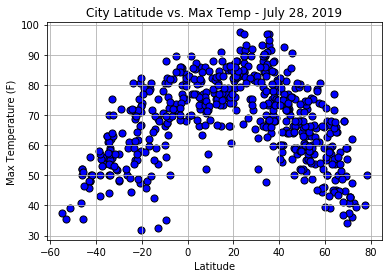

In [47]:
# Latitude vs. Temperature Plot

# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="blue",
           edgecolors = "k", s = 50)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title(f"City Latitude vs. Max Temp - July 28, 2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("output_data/lat_v_max_temp.png")

#### Latitude vs. Humidity Plot

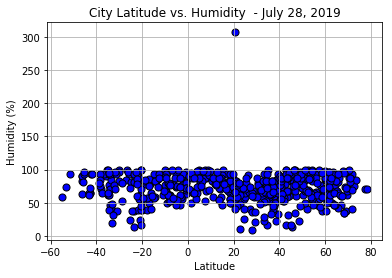

In [48]:
# Latitude vs. Humidity Plot

# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"],color="blue",
           edgecolors = "k", s = 50)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title("City Latitude vs. Humidity  - July 28, 2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("output_data/lat_v_humid.png")

#### Latitude vs. Cloudiness Plot

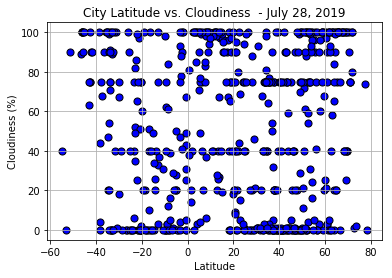

In [49]:
# Latitude vs. Cloudiness Plot

# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="blue",
           edgecolors = "k", s = 50)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title("City Latitude vs. Cloudiness  - July 28, 2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("output_data/lat_v_cloud.png")

#### Latitude vs. Wind Speed Plot

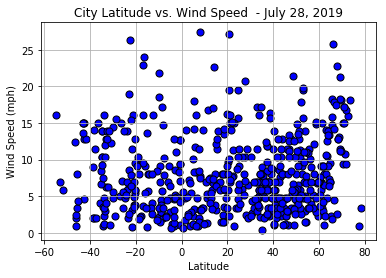

In [50]:
# Latitude vs. Wind Speed Plot

# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="blue",
           edgecolors = "k", s = 50)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title("City Latitude vs. Wind Speed  - July 28, 2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("output_data/lat_v_wind.png")